Versión original en https://lectures.quantecon.org/py/mccall_model.html

# El modelo McCall

Una persona desempleada recibe en cada período una oferta de trabajo de salario $W_t$. En cualquier período $t$, la persona tiene dos opciones:
1. Aceptar la oferta y trabajar permanentement a un salario constante $W_t$.
2. Rechazar la oferta, recibir un seguro de desempleo $c$ y reconsiderar en el siguiente período.

Asumimos que la secuencia de salarios ${W_t}$ es iid con una función de densidad de probabilidad $p_1,\ldots,p_n$, donde $p_i$ es la probabilidad de observar una oferta de salario $W_t = w_i$ en el conjunto $w_1,\ldots,w_n$. 

También asumimos que la persona vive infinitos períodos y que tiene como objetivo maximizar la suma esperada de ingresos descontados,
$$ \mathbb{E} \sum_{t=0}^\infty \beta^t Y_t, \tag{1}$$
donde $\beta\in(0,1)$ es el factor de descuento. $Y_t$ es ingreso, el que es igual a su salario $W_t$ cuando está empleado, o igual a su compensación $c$ cuando está desempleado.

## El *trade off*

- Esperar mucho tiempo por una buena oferta de trabajo es costoso, ya que el futuro se descuenta.
- Aceptar una mala oferta de trabajo temprano es costoso, ya que mejores ofertas podrían llegar en el futuro.

Usaremos un modelo de **programación dinámica** para tomar una decisión óptima que tome en cuenta este *trade off*. Podemos pensar en este modelo como un procedimiento en dos pasos:
1. Asignamos valores a los distintos "estados" (potenciales) de la persona, y
2. deducimos acciones óptimas dados aquellos estados.

A continuación revisamos estos pasos en detalle.

### 1. La función de valor

Para asignar un valor a los estados y valorizar compensación presente vs. futura tenemos que tomar en cuenta que
- todos los pagos presentes que obtenemos de las distintas opciones, y que
- los diferentes estados (ie. empleado o desempleado) a los que esas opciones llevarán en el siguiente período.

Para ponderar correctamente estos dos aspectos del problema de decisión necesitamos **asignar valor** a los distintos estados. Para esto definimos $V(w)$ como el valor total acumulado que comienza el período actual desempleado pero con una oferta de trabajo $w$. Más precisamente, $V(w)$ denota el valor de la función objetivo (1) cuando la persona en esta sitación toma una decisión óptima en el presente y todos los futuros períodos.

$V$ es una función que asigna a cada posible salario $w$ el máximo lifetime value que puede ser obtenido con aquella oferta en mano.
Es crucial notar que $V$ debe satisfacer la siguiente recursión:
$$ V(w) = \max \left\{ \frac{w}{1-\beta}, c+\beta \sum_{i=1}^n V(w_i)p_i \right\} \tag{2} $$
para cada posible $w_i$ en $w_1,\ldots,w_n$.

La expresión en (2) es una versión de la **ecuación de Bellman**, la que es ubicua en modelos de economía dinámica y otras áreas de estudio que involucran planificación intertemporal.
Podemos entender la intuición detrás de esta ecuación pensando en lo siguiente:
- El primer término de la maximización, $\frac{w}{1-\beta}$, es el pago descontado presente de aceptar en este período la oferta $w$, ya que 
$$ \sum_{t=0}^n \beta^t Y_t = w + \beta w + \beta^2 w + \ldots = \frac{w}{1-\beta}. $$
- El segundo término de la maximización es el **valor de continuación**, que es el pago total de rechazar la oferta actual y actuar óptimamente en todos los períodos subsecuentes.

Si optimizamos y elegimos la mejor ($\max$) de estas dos opciones entonces obtendremos el máximo valor esperado, dada la oferta actual $w$.
Sin embargo esto corresponde precisamente al término a la izquierda de la igualdad en (2).

### La Política Óptima

Supongamos que resolvemos (2) para una función $V$ desconocida.
Una vez hecho esto, podemos determinar el comportamiento óptimo (ie. tomar el empleo del período o rechazarlo) simplemente eligiendo el máximo en la expresión a la derecha de la igualdad en (2).

La elección óptima puede ser pensada como una **política**, que es a un mapeo de estados a acciones. En este caso, el estado corresponde a la oferta actual de salario $w$.
Dado *cualquier* $w$, podemos inferir el mejor curso de acción al elegir el máximo en la expresión a la derecha de la igualdad en (2).
De esta forma tenemos un mapeo de $\mathbb{R}$ a $\{0,1\}$, y podemos escribir la política como
$$ \sigma(w) := 1\left\{ \frac{w}{1-\beta} \geq c + \beta \sum_{i=1}^n V(w_i)p_i \right\}, $$
donde $1\{P\}=1$ si $P$ es verdadero, y es igual a cero en caso contrario.

Otra manera de expresar la política es escribiendo
$$ \sigma(w) := 1\{w \geq \overline{w} \}, $$
donde
$$ \overline{w} := (1-\beta) \left\{ c + \beta\sum_{i=1}^n V(w_i)p_i \right\}. $$
En esta expresión $\overline{w}$ denota al **salario de reserva**, una constante que depende de $\beta$, $c$ y la distribución de salarios.
La persona debería aceptar la oferta si y solo si la oferta actual supera al salario de reserva.
Si podemos calcular la función de valor, entonces podemos calcular el salario de reserva.

# Calculando la política óptima (v1)

Para poder resolver el modelo necesitamos calcular la función de valor para distintos puntos $w_1,\ldots,w_n$.
Al hacer esto identificaremos estos valores con el vector $v=(v_i)$, donde definimos $v_i := V(w_i)$.
En términos de (2), este vector satisface el sistema de ecuaciones no lineales
$$ v_i = \max\left\{ \frac{w_i}{1-\beta}, c + \beta\sum_{i=1}^n v_i p_i \right\} \qquad \text{for } i=1,\ldots,n. \tag{3}$$
De hecho, existe exactamente un sólo vector $v := (v_i)_{i=1}^n$ in $\mathbb{R}^n$ que satisface esta ecuación.

## El algoritmo

Para calcular este vector podemos seguir los siguientes pasos:
1. Elegir un valor inicial arbitrario para $v \in \mathbb{R}^n$
2. Calcular un nuevo vector $v' \in \mathbb{R}^n$ de forma que
$$ v'_i = \max\left\{ \frac{w_i}{1-\beta}, c + \beta\sum_{i=1}^n v_i p_i \right\} \qquad \text{for } i=1,\ldots,n. \tag{4}$$
3. Calcular una medida de desviación entre $v$ y $v'$, como por ejemplo $\max_i |v_i - v'_i|$
4. Si la desviación es más grande que algún nivel de tolerancia prefijado, fijar $v=v'$ y volver al paso 2; si no es así, continuar
5. Devolver $v$.

Este algoritmo devuelve un aproximación arbitrariamente buena de la verdadera solución de la función de valor en (3), es decir, la aproximación converge a la verdadera solución a medida que el nivel de tolerancia prefijado tiende a cero.

## Teoría de Punto Fijo

Definimos un mapeo $T$ de $\mathbb{R}^n$ a sí mismo via
$$ T v_i = \max\left\{ \frac{w_i}{1-\beta}, c + \beta\sum_{i=1}^n v_i p_i \right\} \qquad \text{for } i=1,\ldots,n. \tag{5}$$

## Implementación

Comenzamos importando todos los paquetes que usaremos. `Numba.jit` es esencial para paralelizar algunos procesos.

In [2]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import quantecon as qe
from quantecon.distributions import BetaBinomial

Primero definimos una distribución de salarios con la que trabajaremos.

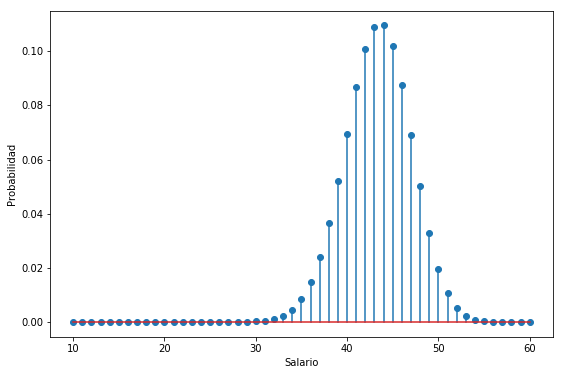

In [3]:
# Distribución de salarios
n, a, b = 50, 200, 100
w_vals = np.linspace(10, 60, n+1)
dist = BetaBinomial(n, a, b)
p_vals = dist.pdf()
# Graficar salarios
fig, ax = plt.subplots(figsize=(9, 6))
ax.stem(w_vals, p_vals, label='$p_i$')
ax.set_xlabel('Salario')
ax.set_ylabel('Probabilidad')
plt.show()

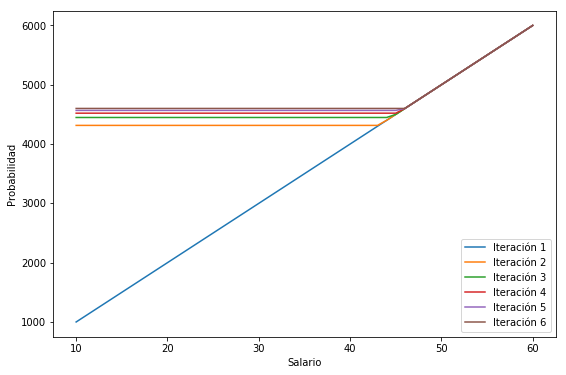

In [4]:
def plot_value_function_seq(ax,
                            c=25,
                            β=0.99,
                            w_vals=w_vals,
                            p_vals=p_vals,
                            num_plots=6):

    v = w_vals / (1 - β)
    v_next = np.empty_like(v)
    for i in range(num_plots):
        ax.plot(w_vals, v, label=f"Iteración {i+1}")
        # Actualizar valor de v
        for j, w in enumerate(w_vals):
            stop_val = w / (1 - β)
            cont_val = c + β * np.sum(v * p_vals)
            v_next[j] = max(stop_val, cont_val)
        v[:] = v_next

    ax.legend(loc='lower right')


fig, ax = plt.subplots(figsize=(9, 6))
plot_value_function_seq(ax)
ax.set_xlabel('Salario')
ax.set_ylabel('Probabilidad')
plt.show()

In [11]:
@jit(nopython=True)
def compute_reservation_wage(c=25,
                             β=0.99,
                             w_vals=w_vals,
                             p_vals=p_vals,
                             max_iter=500,
                             tol=1e-6):

    # == First compute the value function == #

    v = w_vals / (1 - β)
    v_next = np.empty_like(v)
    i = 0
    error = tol + 1
    while i < max_iter and error > tol:

        for j, w in enumerate(w_vals):
            stop_val = w / (1 - β)
            cont_val = c + β * np.sum(v * p_vals)
            v_next[j] = max(stop_val, cont_val)

        error = np.max(np.abs(v_next - v))
        i += 1

        v[:] = v_next  # copy contents into v

    # == Now compute the reservation wage == #

    return (1 - β) * (c + β * np.sum(v * p_vals))

compute_reservation_wage()

47.316499710024964

In [1]:
grid_size = 25
R = np.empty((grid_size, grid_size))

c_vals = np.linspace(10.0, 30.0, grid_size)
β_vals = np.linspace(0.9, 0.99, grid_size)

for i, c in enumerate(c_vals):
    for j, β in enumerate(β_vals):
        R[i, j] = compute_reservation_wage(c=c, β=β)

fig, ax = plt.subplots(figsize=(10, 5.7))

cs1 = ax.contourf(c_vals, β_vals, R.T, alpha=0.75)
ctr1 = ax.contour(c_vals, β_vals, R.T)

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)


ax.set_title("reservation wage")
ax.set_xlabel("$c$")
ax.set_ylabel("$β$")

ax.ticklabel_format(useOffset=False)

plt.show()

NameError: name 'np' is not defined